In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import cv2

from sklearn.metrics import confusion_matrix

In [2]:
# Load the model from the file
filename = '../models/x-ray_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'));

2023-03-19 14:58:24.138124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-19 09:48:12         4681
metadata.json                                  2023-03-19 09:48:12           64
variables.h5                                   2023-03-19 09:48:12     42560296
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
...metrics
......mean
.........vars
............0
.....

2023-03-19 14:58:27.976455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model = loaded_model

In [4]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = int(labels.index(label))
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)).astype('float32') # Reshaping images to preferred size
                resized_arr = np.array(resized_arr)
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
raw_web_test = get_training_data('../data/web_test/')

OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/var/folders/nq/8ndb4d4x7x14kpzhd31gp8f80000gn/T/ipykernel_56977/478339352.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
raw_web_test[:,1]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=object)

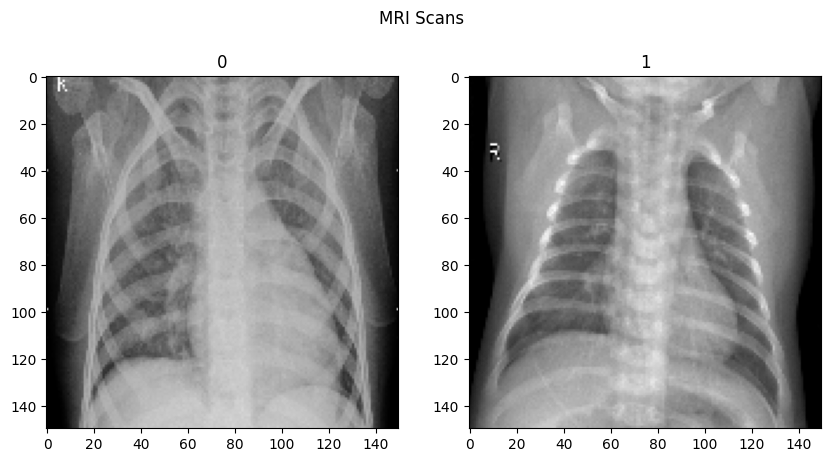

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(raw_web_test[4][0], cmap="gray")
plt.title(raw_web_test[1][1])
# Second subplot
plt.subplot(1,2,2) 
plt.imshow(raw_web_test[6][0], cmap="gray")
plt.title(raw_web_test[6][1])
# Global figure methods
plt.suptitle('MRI Scans')
plt.show()

In [8]:
X_test = []
y_test = []

for feature, label in raw_web_test:
    X_test.append(feature)
    y_test.append(label)

In [9]:
X_test = np.array(X_test) / 255
X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
predictions = (model.predict(X_test) > 0.0001).astype("int32")
cm = confusion_matrix(y_test,predictions)
cm

1/1 [==============================] - 0s 111ms/step


array([[5, 0],
       [1, 4]])

In [11]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [15]:
model.predict(X_test)

1/1 [==============================] - 0s 60ms/step


array([[7.8920320e-06],
       [6.7661335e-06],
       [1.9243725e-08],
       [7.3237846e-11],
       [7.4034568e-07],
       [6.8740970e-05],
       [9.9867350e-01],
       [6.2579878e-02],
       [9.2128469e-03],
       [2.4811812e-02]], dtype=float32)

In [16]:
proba = model.predict_proba(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [18]:
predict_prob=model.predict(X_test)

predict_classes=np.argmax(predict_prob,axis=1)

1/1 [==============================] - 0s 89ms/step


In [19]:
predict_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
raw_test = get_training_data('../data/test/')

/var/folders/nq/8ndb4d4x7x14kpzhd31gp8f80000gn/T/ipykernel_56977/478339352.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [21]:
X_big_test = []
y_big_test = []

for feature, label in raw_test:
    X_big_test.append(feature)
    y_big_test.append(label)

In [22]:
X_big_test = np.array(X_big_test) / 255
X_big_test = X_big_test.reshape(-1, img_size, img_size, 1)
y_big_test = np.array(y_big_test)

In [25]:
predict_prob=model.predict(X_big_test)

20/20 [==============================] - 1s 40ms/step


(array([475.,   4.,   4.,   5.,   1.,   1.,   2.,   3.,   2.,   1.,   0.,
          1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   3.,   2.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   2.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   3.,   7.,
         76.]),
 array([3.7294823e-14, 9.9999998e-03, 2.0000000e-02, 2.9999999e-02,
        3.9999999e-02, 5.0000001e-02, 5.9999999e-02, 7.0000000e-02,
        7.9999998e-02, 9.0000004e-02, 1.0000000e-01, 1.1000000e-01,
        1.2000000e-01, 1.3000000e-01, 1.4000000e-01, 1.5000001e-01,
        1.6000000e-01, 1.7000000e-01, 1.800000

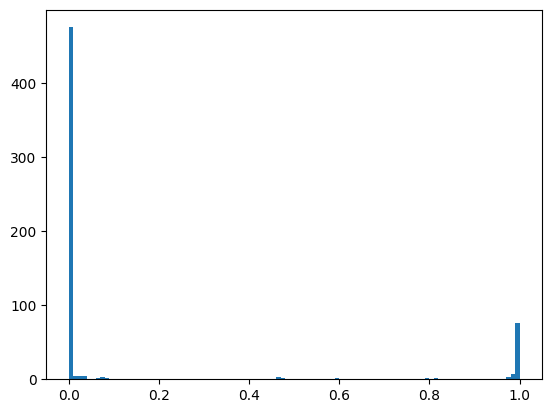